In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full column width
pd.set_option('display.width', None)        # Auto-detect the display width

np.set_printoptions(threshold=np.inf)

Index(['Date', 'Container', 'GCTI', 'CCFI', 'SCFI', 'IPI_TW',
       'Retail sales index_EU', 'Retail value_CN', 'Export_ basemetals ',
       'Import_chemical', 'Retail sales index_US', 'Container_SeasonIndex',
       'Export_chemical', 'Import_ base metals ',
       'Import_vegetable of products', 'WTI crude Oil', 'Export_ plastics'],
      dtype='object')


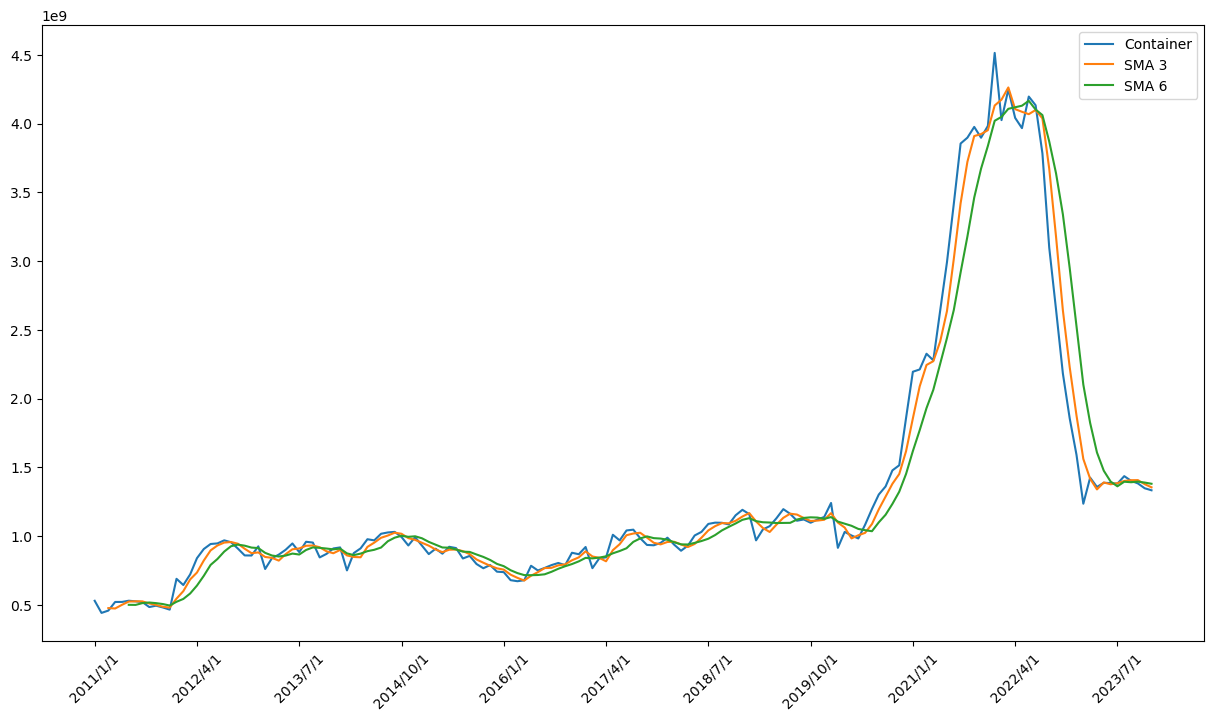

In [280]:
""" First Question """

# part ONE
# Getting the SMA to predict monthly sales of Container for n=3 and n=6.

# Reading the data
data_maritime = pd.read_csv('maritime.csv')
data_maritime = data_maritime.dropna()

print(data_maritime.columns)

x = data_maritime['Date']
y = data_maritime['Container']

# Calculating the SMA for n=3 and n=6
sma3 = y.rolling(window=3).mean()
sma6 = y.rolling(window=6).mean()

# Plotting the data
plt.figure(figsize=(15, 8))
plt.plot(x, y, label='Container')
plt.plot(x, sma3, label='SMA 3')
plt.plot(x, sma6, label='SMA 6')

plt.xticks(ticks=x[::len(x)//10], rotation=45)

plt.legend()
plt.show()

In [281]:
""" Still Question 1 """
# apply multiple linear regression (MLR) to conduct forecasting, indicate the significant predictors, R2

# Getting the data
# data = pd.read_csv('maritime.csv')
# data = data.dropna()

# Counting the corilation between the variables of each predictor without date
data_maritime_date = data_maritime['Date']
x_predictors = data_maritime.drop(['Date'], axis=1)
correlation = x_predictors.corr()["Container"]

# print(correlation)

print(correlation[correlation > 0.5])

# show the statistical summary of the data
print(x_predictors.describe())

all_features = data_maritime.drop(['Date', 'Container'], axis=1)
x = sm.add_constant(all_features.iloc[:,0:])
y = data_maritime['Container']

result = sm.OLS(y,x).fit()

print(result.summary())


Container                1.000000
GCTI                     0.692227
CCFI                     0.950263
SCFI                     0.941176
Retail sales index_EU    0.663506
Retail sales index_US    0.799793
Name: Container, dtype: float64
          Container        GCTI         CCFI         SCFI      IPI_TW  \
count  1.560000e+02  156.000000   156.000000   156.000000  156.000000   
mean   1.325706e+09  107.901085  1207.218932  1356.690174  101.947756   
std    9.527298e+08   11.775828   701.605281  1084.223243   13.518781   
min    4.420501e+08   86.969777   640.270000   411.325000   76.660000   
25%    8.587735e+08   98.728122   829.243750   821.026250   92.942500   
50%    9.696601e+08  107.460064   959.742500   987.541250  100.515000   
75%    1.310520e+09  119.742500  1124.338750  1162.582500  108.632500   
max    4.514152e+09  129.720000  3510.825000  5066.861000  142.450000   

       Retail sales index_EU  Retail value_CN  Export_ basemetals   \
count             156.000000       1

In [282]:
""" Question One part 3"""

# calculating the MLR
# Getting the predictors
print(data_maritime.columns)
# p-value < 0.05
# x = data_maritime[["GCTI","CCFI","SCFI","Retail value_CN","Export_ basemetals ","Import_vegetable of products","WTI crude Oil"]]

# p-value < 0.01
x = data_maritime[["GCTI","CCFI","IPI_TW","Export_ basemetals ","WTI crude Oil"]]

# p-value about 0.000
# x = data_maritime[["GCTI","CCFI"]]

# Getting the target
y = data_maritime['Container']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying the MLR
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculating the RMSE, MAE, and MAPE for MLR
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MLR:")
print(f'RMSE for MLR: \t{rmse}')
print(f'MAE for MLR: \t{mae}')
print(f'MAPE for MLR: \t{mape}')

# MSA parts
rmse_sma3 = np.sqrt(mean_squared_error(data_maritime['Container'][2:], sma3.dropna()))
mae_sma3 = mean_absolute_error(data_maritime['Container'][2:], sma3.dropna())
mape_sma3 = np.mean(np.abs((data_maritime['Container'][2:] - sma3.dropna()) / data_maritime['Container'][2:])) * 100

rmse_sma6 = np.sqrt(mean_squared_error(data_maritime['Container'][5:], sma6.dropna()))
mae_sma6 = mean_absolute_error(data_maritime['Container'][5:], sma6.dropna())
mape_sma6 = np.mean(np.abs((data_maritime['Container'][5:] - sma6.dropna()) / data_maritime['Container'][5:])) * 100

print()
print("SMA3:")
print(f'RMSE SMA 3: \t{rmse_sma3}')
print(f'MAE SMA 3: \t{mae_sma3}')
print(f'MAPE SMA 3: \t{mape_sma3}')

print()
print("SMA6:")
print(f'RMSE SMA 6: \t{rmse_sma6}')
print(f'MAE SMA 6: \t{mae_sma6}')
print(f'MAPE SMA 6: \t{mape_sma6}')

Index(['Date', 'Container', 'GCTI', 'CCFI', 'SCFI', 'IPI_TW',
       'Retail sales index_EU', 'Retail value_CN', 'Export_ basemetals ',
       'Import_chemical', 'Retail sales index_US', 'Container_SeasonIndex',
       'Export_chemical', 'Import_ base metals ',
       'Import_vegetable of products', 'WTI crude Oil', 'Export_ plastics'],
      dtype='object')
MLR:
RMSE for MLR: 	89631150.65677144
MAE for MLR: 	69966627.93497604
MAPE for MLR: 	6.991312677394587

SMA3:
RMSE SMA 3: 	126492349.37963654
MAE SMA 3: 	69455391.89025974
MAPE SMA 3: 	4.744153890782772

SMA6:
RMSE SMA 6: 	267226011.4558971
MAE SMA 6: 	142192384.97041944
MAPE SMA 6: 	9.213772620137073


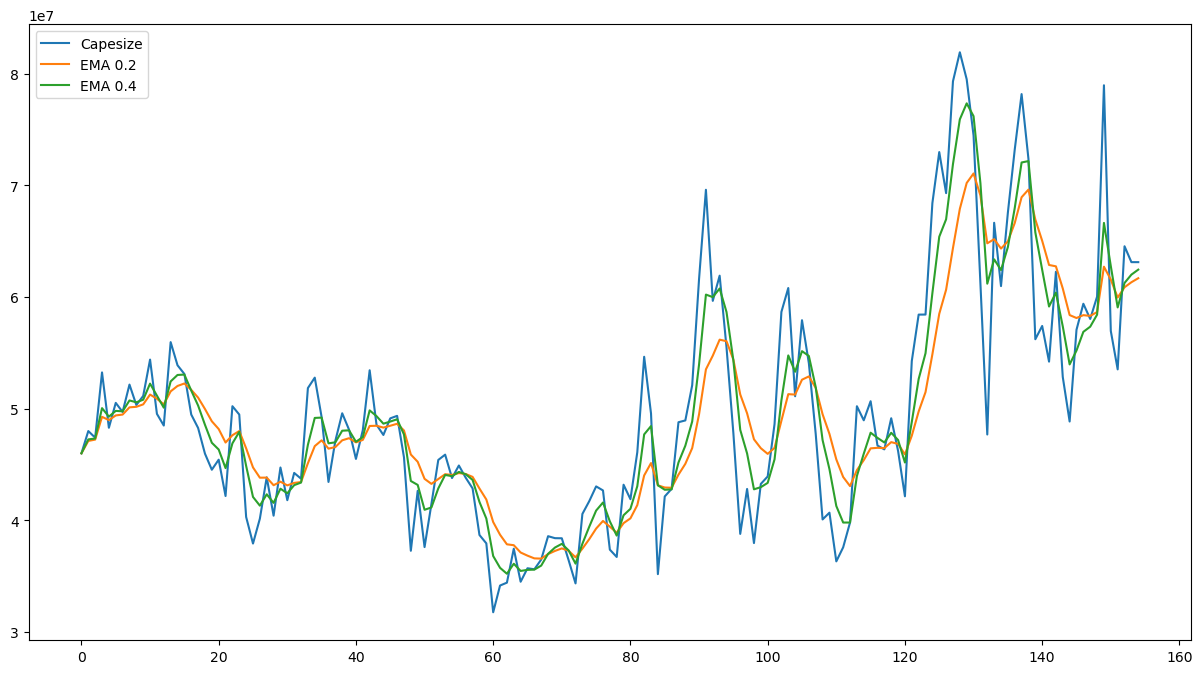

In [283]:
""" Finally Question 2 """

# Based on the attached file, conduct exponential moving average (EMA) to predict monthly sales of Capesize for alpha=0.2 and alpha=0.4

# Getting the data
data_capsize = pd.read_csv('maritime-capesize.csv')
data_capsize = data_capsize.dropna()
# Getting the target
y = data_capsize['Capesize']

# Calculating the EMA for alpha=0.2 and alpha=0.4
ema02 = y.ewm(alpha=0.2).mean()
ema04 = y.ewm(alpha=0.4).mean()

# Plotting the data

plt.figure(figsize=(15, 8))
plt.plot(y, label='Capesize')
plt.plot(ema02, label='EMA 0.2')
plt.plot(ema04, label='EMA 0.4')

plt.legend()
plt.show()

In [284]:
""" Question 2 getting the significant predictors """

# Getting the predictors
print(data_capsize.columns)

# count the correlation between the variables of each predictor without date
x_predictors = data_capsize.drop(['Date'], axis=1)
correlation = x_predictors.corr()["Capesize"]

print(correlation[correlation > 0.6])

# show the statistical summary of the data
print(x_predictors.describe())

all_features_in_container = data_capsize.drop(['Date', 'Capesize'], axis=1)
x = sm.add_constant(all_features_in_container.iloc[:,0:])
y = data_capsize['Capesize']

result = sm.OLS(y,x).fit()
print(result.summary())

Index(['Date', 'Capesize', 'BSI_t-1', 'BHI_t-1', 'BCI_t-1', 'BPI_t-1',
       'Australian thermal coal', 'Soybeans', 'Wheat', 'WTI crude Oil',
       'IMF_base metal index', 'Corn', 'CN_metal production',
       'Bulk(capesize)_SeasonIndex', 'Rock Phosphate', 'Iron Ore', 'PPI_CN',
       'PPI_US'],
      dtype='object')
Capesize    1.000000
BSI_t-1     0.771485
BHI_t-1     0.754689
BCI_t-1     0.630455
BPI_t-1     0.773032
PPI_US      0.702457
Name: Capesize, dtype: float64
           Capesize      BSI_t-1      BHI_t-1      BCI_t-1      BPI_t-1  \
count  1.550000e+02   155.000000   155.000000   155.000000   155.000000   
mean   4.966808e+07  1102.745161   634.735484  1963.709677  1393.729032   
std    1.059402e+07   596.768934   343.541285  1204.738216   725.026932   
min    3.177408e+07   271.000000   197.000000  -291.000000   334.000000   
25%    4.241683e+07   738.000000   438.250000  1260.000000   875.500000   
50%    4.827414e+07   933.000000   546.000000  1662.500000  1252.000000

In [285]:
"""  Question 2 part 3 """

# calculating the MLR
# Getting the predictors
print(data_capsize.columns)

# correlation > 0.6
x = data_capsize[["BSI_t-1","BHI_t-1","BCI_t-1","BPI_t-1","PPI_US"]]

# p-value < 0.05
# x = data_capsize[["BCI_t-1","Soybeans","WTI crude Oil","CN_metal production","Bulk(capesize)_SeasonIndex","Rock Phosphate"]]

# p-value < 0.01
# x = data_capsize[["BCI_t-1","WTI crude Oil","CN_metal production","Rock Phosphate"]]

# p-value about 0.000
# x = data_capsize[["BCI_t-1","CN_metal production"]]

# Getting the target
y = data_capsize['Capesize']

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying the MLR
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Calculating the RMSE, MAE, and MAPE for MLR
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("MLR:")
print(f'RMSE for MLR: \t{rmse}')
print(f'MAE for MLR: \t{mae}')
print(f'MAPE for MLR: \t{mape}')

# EMA parts
rmse_ema02 = np.sqrt(mean_squared_error(data_capsize['Capesize'], ema02))
mae_ema02 = mean_absolute_error(data_capsize['Capesize'], ema02)
mape_ema02 = np.mean(np.abs((data_capsize['Capesize'] - ema02) / data_capsize['Capesize'])) * 100

rmse_ema04 = np.sqrt(mean_squared_error(data_capsize['Capesize'], ema04))
mae_ema04 = mean_absolute_error(data_capsize['Capesize'], ema04)
mape_ema04 = np.mean(np.abs((data_capsize['Capesize'] - ema04) / data_capsize['Capesize'])) * 100

print()
print("EMA 0.2:")
print(f'RMSE EMA 0.2: \t{rmse_ema02}')
print(f'MAE EMA 0.2: \t{mae_ema02}')
print(f'MAPE EMA 0.2: \t{mape_ema02}')

print()
print("EMA 0.4:")
print(f'RMSE EMA 0.4: \t{rmse_ema04}')
print(f'MAE EMA 0.4: \t{mae_ema04}')
print(f'MAPE EMA 0.4: \t{mape_ema04}')


Index(['Date', 'Capesize', 'BSI_t-1', 'BHI_t-1', 'BCI_t-1', 'BPI_t-1',
       'Australian thermal coal', 'Soybeans', 'Wheat', 'WTI crude Oil',
       'IMF_base metal index', 'Corn', 'CN_metal production',
       'Bulk(capesize)_SeasonIndex', 'Rock Phosphate', 'Iron Ore', 'PPI_CN',
       'PPI_US'],
      dtype='object')
MLR:
RMSE for MLR: 	8747427.278278917
MAE for MLR: 	7138083.140297267
MAPE for MLR: 	13.931517665247622

EMA 0.2:
RMSE EMA 0.2: 	5590130.9469092265
MAE EMA 0.2: 	4084583.5742765134
MAPE EMA 0.2: 	8.097875779932629

EMA 0.4:
RMSE EMA 0.4: 	3778551.5528804385
MAE EMA 0.4: 	2754421.4952529115
MAPE EMA 0.4: 	5.4809995112868295
